In [1]:
# import the librarie for convolutional neural network

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
 # Split data into train and validation set, 
train_dataset_path = '/Users/hesborn/Desktop/train/'
validation_dataset_path = '/Users/hesborn/Desktop/validation/'

In [4]:
# image must have same pixels and 250 by 250 pixels
IMG_WIDTH = 250
IMG_HEIGHT = 250
BATCH_SIZE = 20

In [5]:
# data augementation on the train set
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip = True,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 581 images belonging to 6 classes.


In [6]:
# validation set
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 227 images belonging to 6 classes.


In [7]:
#validation set of finger millet images 

labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : class1
1 : class2
2 : class3
3 : class4
4 : class5
5 : healthy


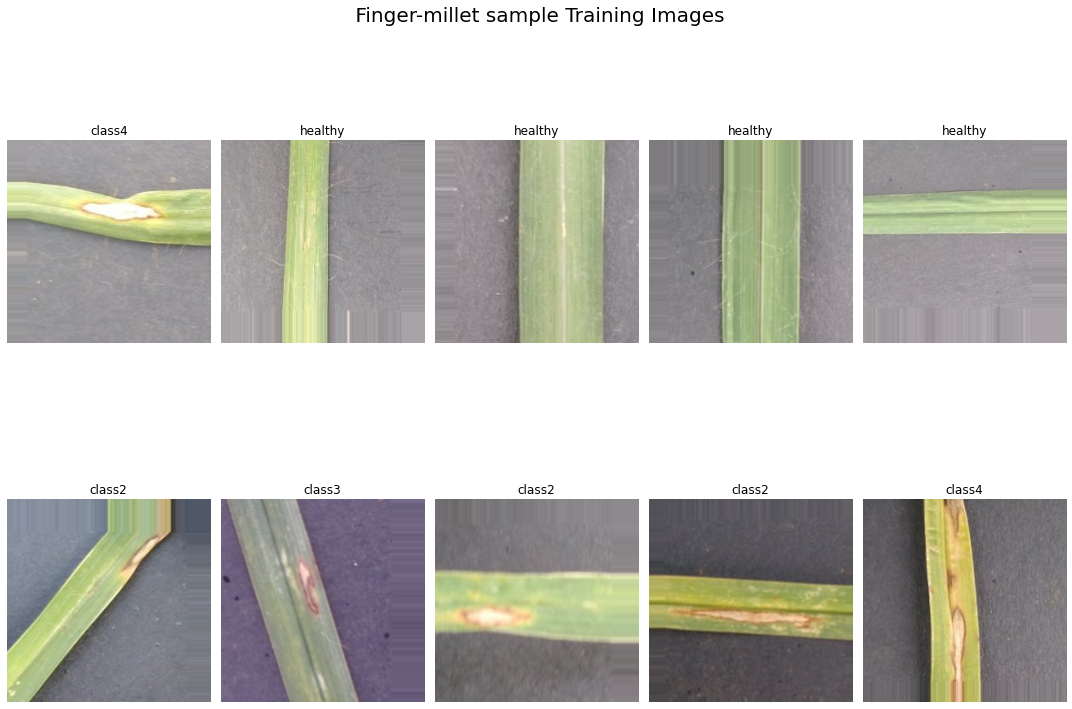

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 2

plt.tight_layout()
plt.suptitle(" Finger-millet sample Training Images", fontsize=20)
plt.show()

In [13]:

# cnn model with convolutional layers
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        #Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        #Activation('relu'),
        #MaxPooling2D(pool_size=(2, 2)),
        #BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
    
    return model

In [14]:
cnn_model = create_model()

In [15]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 246, 246, 128)     9728      
_________________________________________________________________
activation (Activation)      (None, 246, 246, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 128)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 123, 123, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      36896     
_________________________________________________________________
activation_1 (Activation)    (None, 121, 121, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [17]:
optimizer = Adam(learning_rate=0.001)

In [18]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
30/30 - 164s - loss: 52.5593 - accuracy: 0.3993 - val_loss: 47.3641 - val_accuracy: 0.0573
Epoch 2/50
30/30 - 145s - loss: 52.2102 - accuracy: 0.4544 - val_loss: 24.6880 - val_accuracy: 0.6123
Epoch 3/50
30/30 - 143s - loss: 61.9673 - accuracy: 0.4802 - val_loss: 40.6577 - val_accuracy: 0.1366
Epoch 4/50
30/30 - 141s - loss: 48.8546 - accuracy: 0.5077 - val_loss: 32.3611 - val_accuracy: 0.6123
Epoch 5/50
30/30 - 167s - loss: 40.1441 - accuracy: 0.4888 - val_loss: 42.1286 - val_accuracy: 0.6035
Epoch 6/50
30/30 - 150s - loss: 31.4674 - accuracy: 0.5594 - val_loss: 19.1905 - val_accuracy: 0.6123
Epoch 7/50
30/30 - 148s - loss: 19.3825 - accuracy: 0.5542 - val_loss: 33.3725 - val_accuracy: 0.0661
Epoch 8/50
30/30 - 245s - loss: 14.0560 - accuracy: 0.5611 - val_loss: 27.2784 - val_accuracy: 0.0837
Epoch 9/50
30/30 - 142s - loss: 10.7560 - accuracy: 0.5766 - val_loss: 17.9989 - val_accuracy: 0.0925
Epoch 10/50
30/30 - 140s - loss: 9.0016 - accuracy: 0.5904 - val_loss: 10.5347 - v

In [31]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

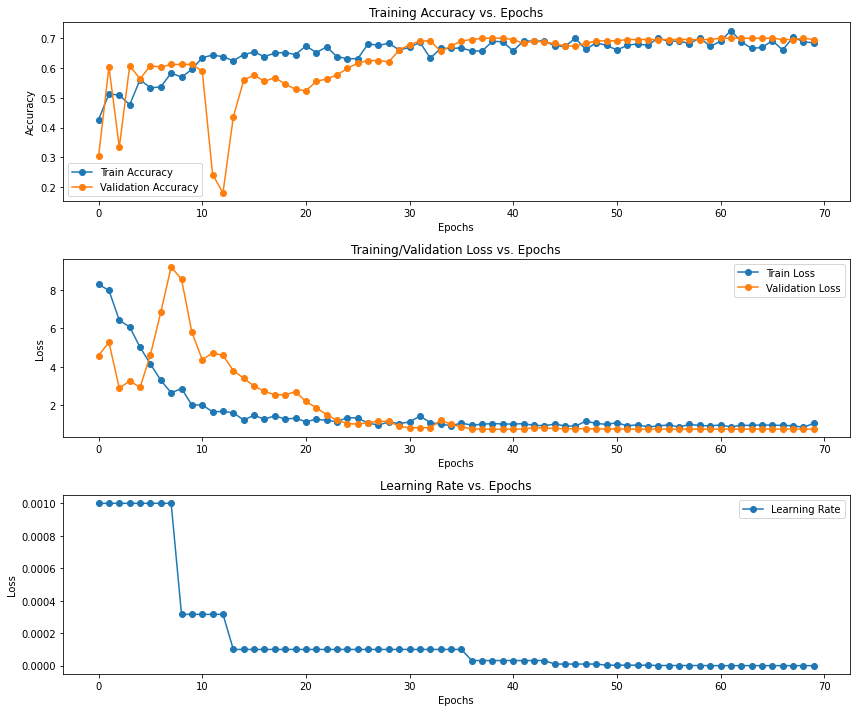

In [32]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [45]:
# test the model on unseen finger millet images
test_dataset = '/Users/hesborn/Desktop/test/'

In [46]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')


Found 227 images belonging to 6 classes.


In [47]:
#make prediction using the unseen data
predictions = cnn_model.predict(test_generator)

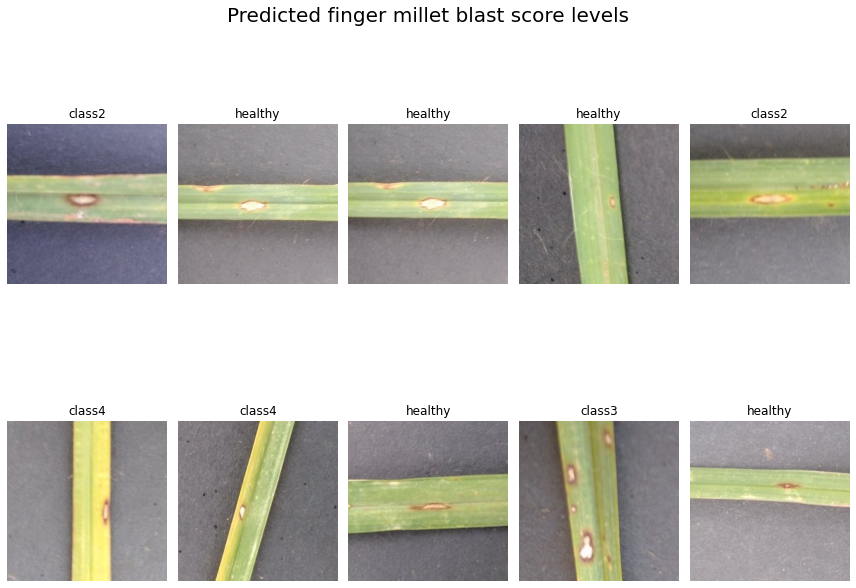

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Predicted finger millet blast score levels", fontsize=20)
plt.show()

In [49]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

8/8 [==============================] - 15s 2s/step - loss: 0.7614 - accuracy: 0.6960


In [50]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.7614060640335083
Test Accuracy: 0.6960352659225464


In [51]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

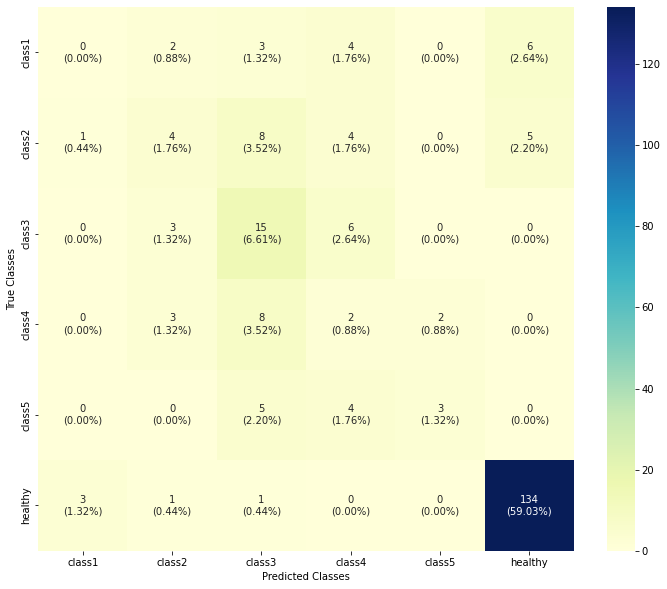

In [52]:
# evalution of the model using confusin matrix
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [53]:
# model evalution using recall,precision and f1-score

print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

      class1       0.00      0.00      0.00        15
      class2       0.31      0.18      0.23        22
      class3       0.38      0.62      0.47        24
      class4       0.10      0.13      0.11        15
      class5       0.60      0.25      0.35        12
     healthy       0.92      0.96      0.94       139

    accuracy                           0.70       227
   macro avg       0.38      0.36      0.35       227
weighted avg       0.67      0.70      0.68       227



In [54]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [55]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

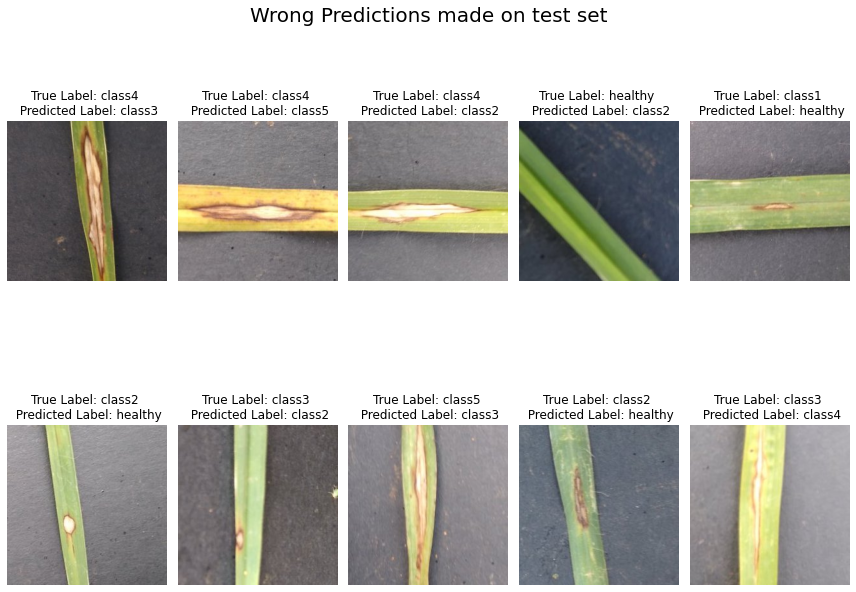

In [56]:
# plot wrong predictions by the model
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()